## Line Fitting using Leastr Squares and Expectation–maximization algorithm

#### Importing dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *
import random
import math

### Least Squares Method

#### Generating data points

In [2]:
## X=np.linspace(0.0, 1.0, num=20) ## Stepsize is 0.5
X=np.arange(0,1,0.05).tolist()
y=[2*x+1 for x in X]

In [3]:
def line_fitting(X,Y):
    E=0
    a=Symbol('a')
    b=Symbol('b')
    for i in range(len(X)):
        E+=(Y[i]-(a*X[i]+b))**2
    dE_da=E.diff(a)
    dE_db=E.diff(b)
    A=Eq(dE_da)
    B=Eq(dE_db)
    final_values= solve((A,B),(a,b))
    a=final_values[a]
    b=final_values[b]
    theta=[a,b]
    actual=[]
    a=theta[0]
    b=theta[1]
    for i in range(len(X)):
        actual.append(a*X[i]+b)
    plt.plot(X,Y,'.')
    plt.plot(X,actual)
    return theta

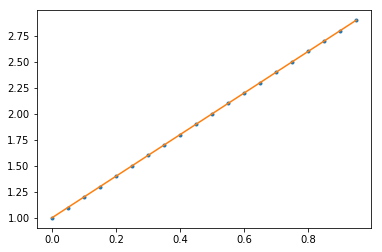

In [4]:
theta =line_fitting(X,y)

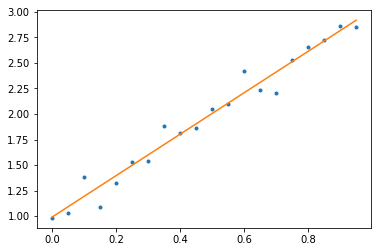

In [5]:
## Question 1

## part 2

##X=np.linspace(0.0, 1.0, num=20) ## Stepsize is 0.5
X=np.arange(0,1,0.05).tolist()
y=[2*x+1+0.1*random.gauss(0,1) for x in X]

theta =line_fitting(X,y)

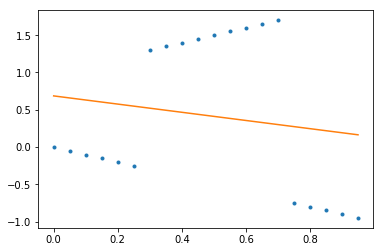

In [6]:
## Question 1

## Part 3

##X=np.linspace(0.0, 1.0, num=20) ## Stepsize is 0.5
X=np.arange(0,1,0.05).tolist()
Y=[(-x) if abs(x-0.5)>=0.25 else (x+1) for x in X]

theta=line_fitting(X,Y)

### Expectation–maximization algorithm method

#### Generating datapoints without any Gaussian Noise

In [7]:
## EM ALGORITHM Part 1(No Gaussian noise)

X=np.arange(0,1,0.05).tolist()
Y=[(-x) if abs(x-0.5)>=0.25 else (x+1) for x in X]

In [8]:
def EM_algorithm(X,Y):
    
    ## Initializing the parameter values in the following way as one line has a larger slope
    # when compared to the other and also the parameters define line which are not too far
    # with respect to the data points.
    
    ## Also, I have noticed that my EM algorithm is quite robust 
    #inspite of being tested with parameters far from the data points
    
    a1=3
    b1=1
    a2=2
    b2=0
    sigma=0.1
    S_W1=0
    S_W2=0
    S_W1_X=0
    S_W2_X=0
    S_W1_Xsq=0
    S_W2_Xsq=0
    S_W1_X_Y=0
    S_W2_X_Y=0
    S_W1_Y=0
    S_W2_Y=0
    for v in range(5):
        Weight_list=[]
        weightlist1=[]
        weightlist2=[]
        for i in range(len(X)):
            r1 = a1*X[i] + b1 - Y[i]
            r2 = a2*X[i] + b2 - Y[i]
            w1= exp(-(r1**2)/(sigma))/(exp(-(r1**2)/(sigma)) + exp(-(r2**2)/(sigma)))
            w2= exp(-(r2**2)/(sigma))/(exp(-(r1**2)/(sigma)) + exp(-(r2**2)/(sigma)))
            W=[w1,w2]
            weightlist1.append(w1)
            weightlist2.append(w2)
            Weight_list.append(W)
        print('This is a plot for iteration number:',v+1,' E step for W1 vs X')
        plt.plot(weightlist1,X, 'ro')
        plt.show()
        print('This is a plot for iteration number:',v+1,' E step for W2 vs X')
        plt.plot(weightlist2,X, 'bo')
        plt.show()
        
        S_W1=0
        S_W2=0
        S_W1_X=0
        S_W2_X=0
        S_W1_Xsq=0
        S_W2_Xsq=0
        S_W1_X_Y=0
        S_W2_X_Y=0
        S_W1_Y=0
        S_W2_Y=0 
        for i in range(len(Weight_list)):
            S_W1+=Weight_list[i][0]
            S_W2+=Weight_list[i][1]
            S_W1_X+=Weight_list[i][0]*X[i]
            S_W2_X+=Weight_list[i][1]*X[i]
            S_W1_Xsq+=Weight_list[i][0]*(X[i]**2)
            S_W2_Xsq+=Weight_list[i][1]*(X[i]**2)
            S_W1_X_Y+=Weight_list[i][0]*X[i]*Y[i]
            S_W2_X_Y+=Weight_list[i][1]*X[i]*Y[i]
            S_W1_Y+=Weight_list[i][0]*Y[i]
            S_W2_Y+=Weight_list[i][1]*Y[i]

        a = np.array([[S_W1_Xsq,S_W1_X], [S_W1_X,S_W1]], dtype='float')
        b = np.array([S_W1_X_Y,S_W1_Y], dtype='float')
        theta1 = np.linalg.solve(a, b)

        c = np.array([[S_W2_Xsq,S_W2_X], [S_W2_X,S_W2]], dtype='float')
        d = np.array([S_W2_X_Y,S_W2_Y], dtype='float')
        theta2 = np.linalg.solve(c, d)

        a1=theta1[0]
        b1=theta1[1]

        a2=theta2[0]
        b2=theta2[1]
        
        print('This is a plot for iteration number:',v+1,' M step')
        actual=[]
        for i in range(len(X)):
            actual.append(a1*X[i]+b1)
        plt.plot(X,Y,'.')
        plt.plot(X,actual)
        
        actual=[]
        for i in range(len(X)):
            actual.append(a2*X[i]+b2)
        plt.plot(X,Y,'.')
        plt.plot(X,actual)
        plt.show()
    c1=1
    c2=1
    ## I am considering lines of the form:
    ##   c1*Y= a1*X + b1
    ##   c2*Y= a2*X + b2
    ## c1 and c2 are always 1 in my case
    return a1,b1,c1,a2,b2,c2,weightlist1,weightlist2

This is a plot for iteration number: 1  E step for W1 vs X


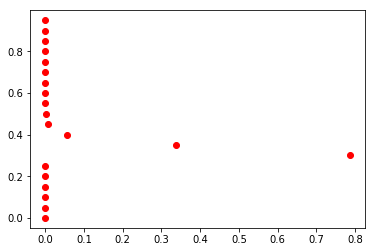

This is a plot for iteration number: 1  E step for W2 vs X


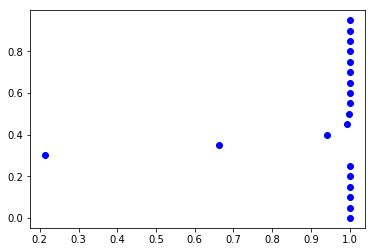

This is a plot for iteration number: 1  M step


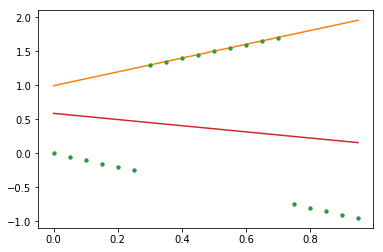

This is a plot for iteration number: 2  E step for W1 vs X


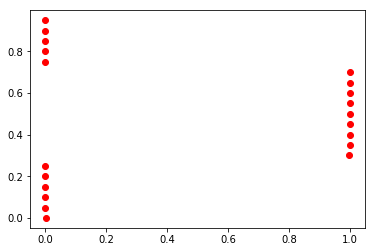

This is a plot for iteration number: 2  E step for W2 vs X


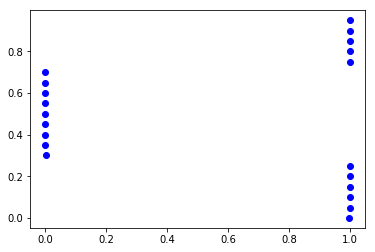

This is a plot for iteration number: 2  M step


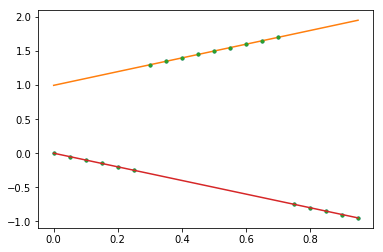

This is a plot for iteration number: 3  E step for W1 vs X


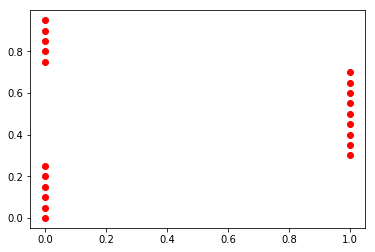

This is a plot for iteration number: 3  E step for W2 vs X


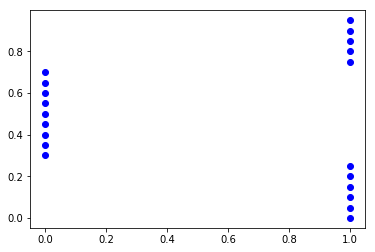

This is a plot for iteration number: 3  M step


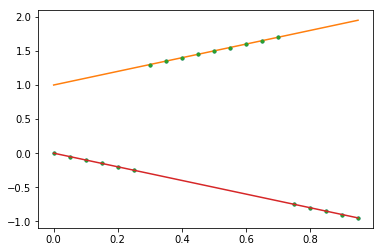

This is a plot for iteration number: 4  E step for W1 vs X


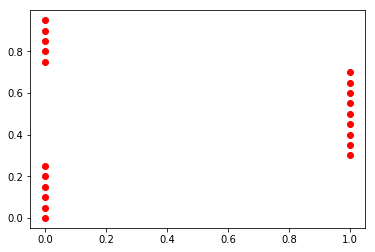

This is a plot for iteration number: 4  E step for W2 vs X


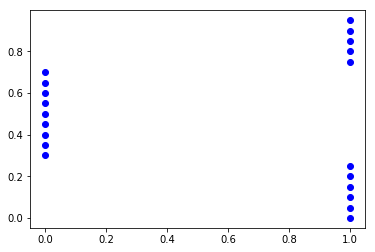

This is a plot for iteration number: 4  M step


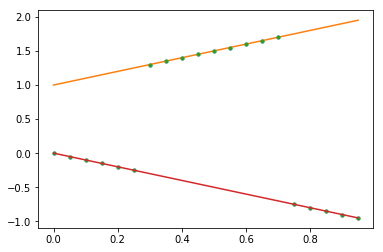

This is a plot for iteration number: 5  E step for W1 vs X


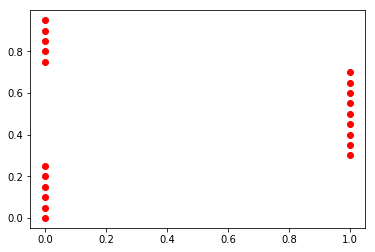

This is a plot for iteration number: 5  E step for W2 vs X


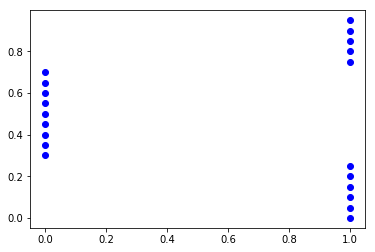

This is a plot for iteration number: 5  M step


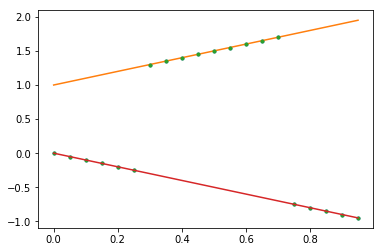

In [9]:
a_1,b_1,c_1,a_2,b_2,c_2,weight_list_1,weight_list_2=EM_algorithm(X,Y)

### EM Algorithm Part 2 Explaination:

###  I have experimented with Gaussian noise on the y coordinate of the dataset and I observed the following: 

### 1) The lines were fitting the data points well for sigma values lying between 0.1 and 0.5

### 2) The algorithm was 'Breaking' when I increased the values from 0.5 and kept breaking as I moved up. I have plotted the graphs for values of sigma: 0.5, 0.8, 1 and 2 and have observed massive deviations for line slopes and intercepts from sigma value 0.5

### 3) I would like to conclude that my algorithm broke after sigma values of 0.5

#### Generating datapoints with Gaussian Noise

This is a plot for iteration number: 1  E step for W1 vs X


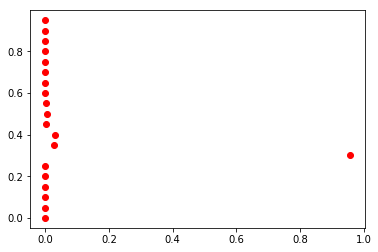

This is a plot for iteration number: 1  E step for W2 vs X


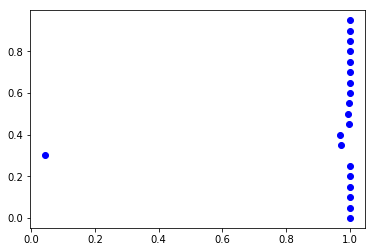

This is a plot for iteration number: 1  M step


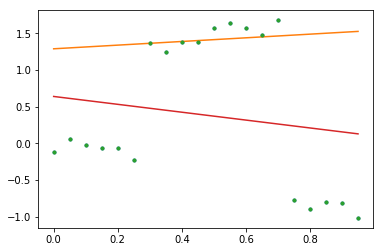

This is a plot for iteration number: 2  E step for W1 vs X


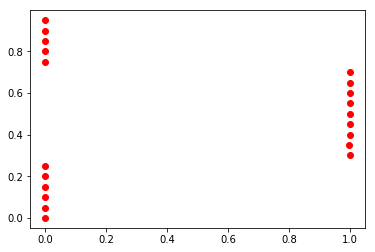

This is a plot for iteration number: 2  E step for W2 vs X


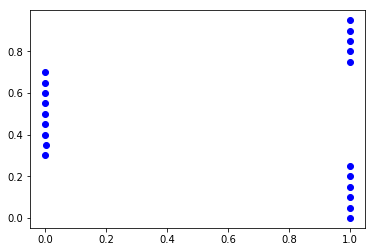

This is a plot for iteration number: 2  M step


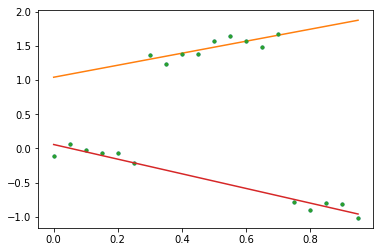

This is a plot for iteration number: 3  E step for W1 vs X


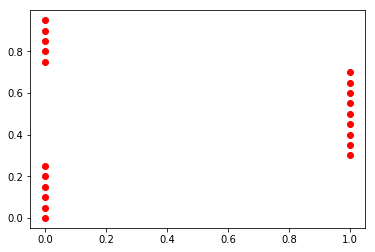

This is a plot for iteration number: 3  E step for W2 vs X


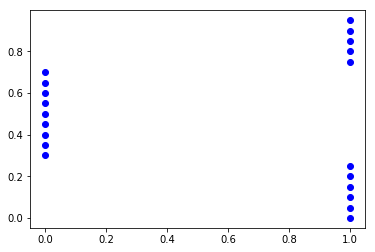

This is a plot for iteration number: 3  M step


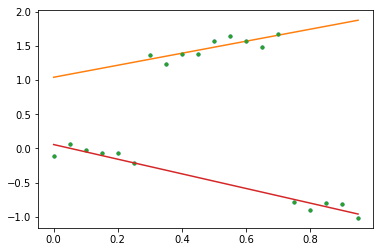

This is a plot for iteration number: 4  E step for W1 vs X


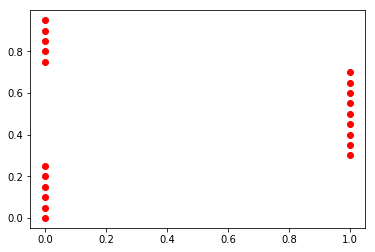

This is a plot for iteration number: 4  E step for W2 vs X


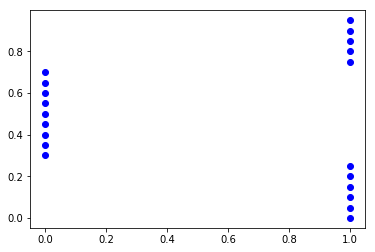

This is a plot for iteration number: 4  M step


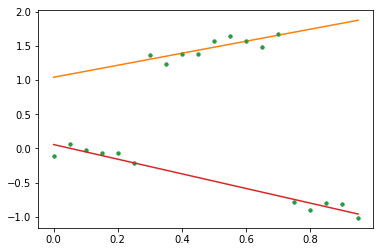

This is a plot for iteration number: 5  E step for W1 vs X


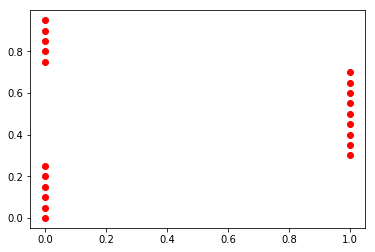

This is a plot for iteration number: 5  E step for W2 vs X


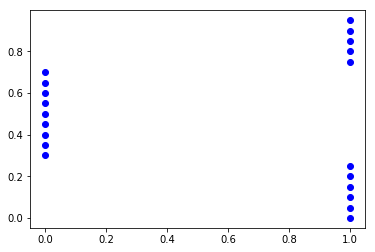

This is a plot for iteration number: 5  M step


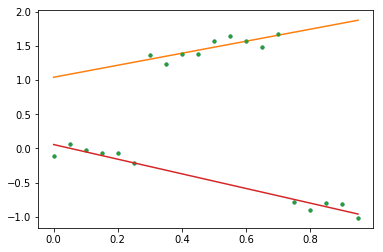

In [11]:
## Question 2
## EM ALGORITHM WITH GAUSSIAN NOISE (Part2)

mu, sigma = 0, 0.1

X=np.arange(0,1,0.05).tolist()
Y=[(-x) if abs(x-0.5)>=0.25 else (x+1) for x in X]  
noise = np.random.normal(mu, sigma, [20,])
Y=Y+noise
a_1,b_1,c_1,a_2,b_2,c_2,weight_list_1,weight_list_2=EM_algorithm(X,Y)

This is a plot for iteration number: 1  E step for W1 vs X


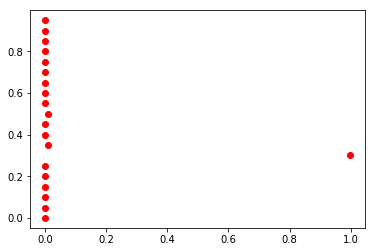

This is a plot for iteration number: 1  E step for W2 vs X


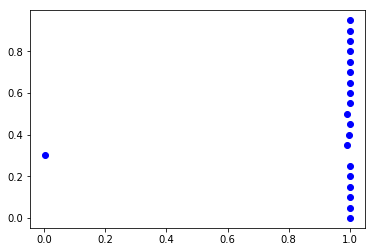

This is a plot for iteration number: 1  M step


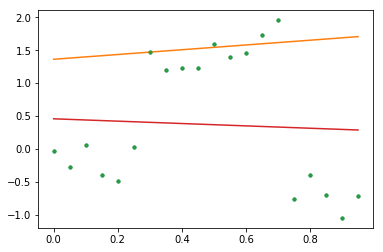

This is a plot for iteration number: 2  E step for W1 vs X


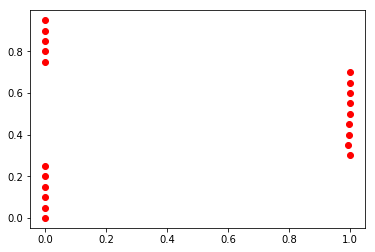

This is a plot for iteration number: 2  E step for W2 vs X


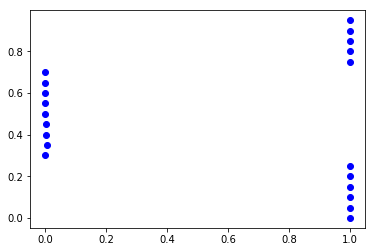

This is a plot for iteration number: 2  M step


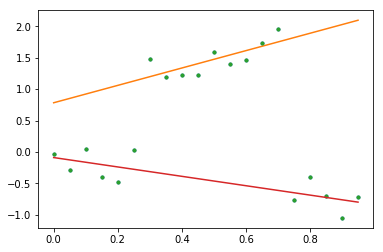

This is a plot for iteration number: 3  E step for W1 vs X


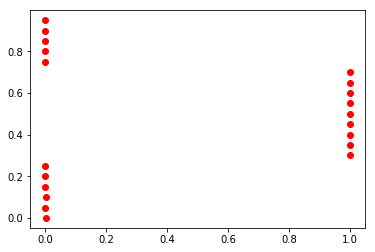

This is a plot for iteration number: 3  E step for W2 vs X


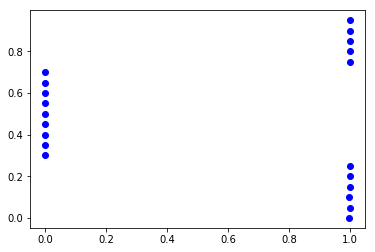

This is a plot for iteration number: 3  M step


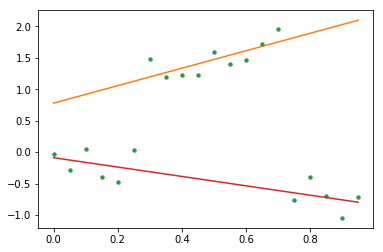

This is a plot for iteration number: 4  E step for W1 vs X


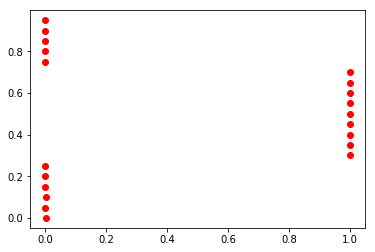

This is a plot for iteration number: 4  E step for W2 vs X


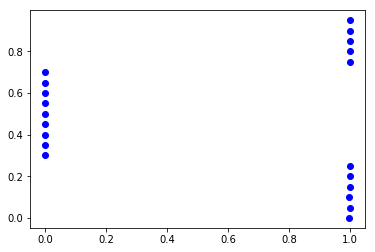

This is a plot for iteration number: 4  M step


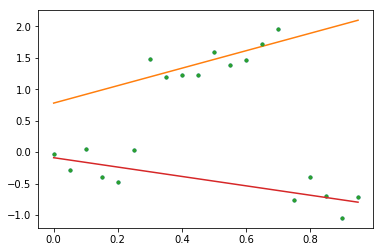

This is a plot for iteration number: 5  E step for W1 vs X


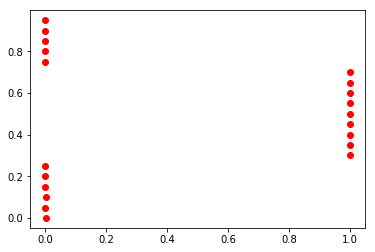

This is a plot for iteration number: 5  E step for W2 vs X


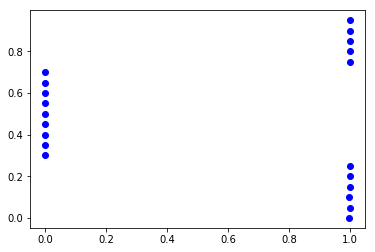

This is a plot for iteration number: 5  M step


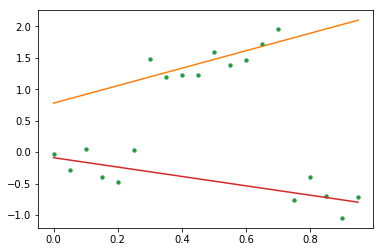

In [12]:
## Question 2
## EM ALGORITHM WITH GAUSSIAN NOISE

mu, sigma = 0, 0.2

X=np.arange(0,1,0.05).tolist()
Y=[(-x) if abs(x-0.5)>=0.25 else (x+1) for x in X]  
noise = np.random.normal(mu, sigma, [20,])
Y=Y+noise
a_1,b_1,c_1,a_2,b_2,c_2,weight_list_1,weight_list_2=EM_algorithm(X,Y)

This is a plot for iteration number: 1  E step for W1 vs X


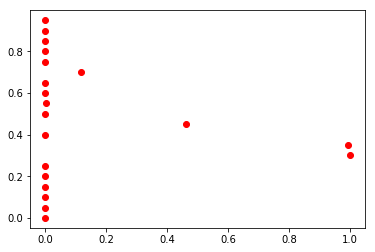

This is a plot for iteration number: 1  E step for W2 vs X


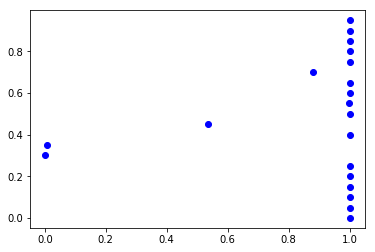

This is a plot for iteration number: 1  M step


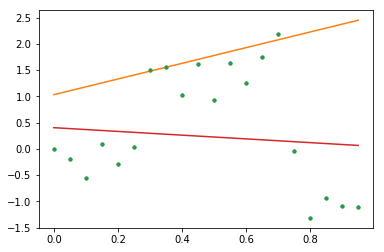

This is a plot for iteration number: 2  E step for W1 vs X


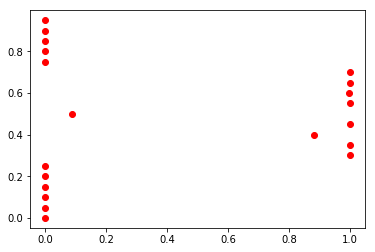

This is a plot for iteration number: 2  E step for W2 vs X


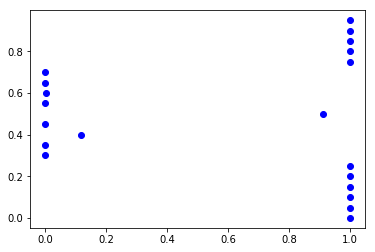

This is a plot for iteration number: 2  M step


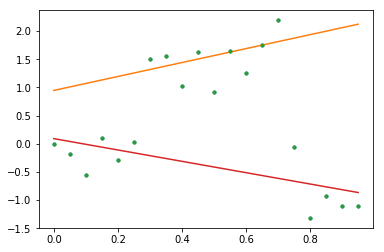

This is a plot for iteration number: 3  E step for W1 vs X


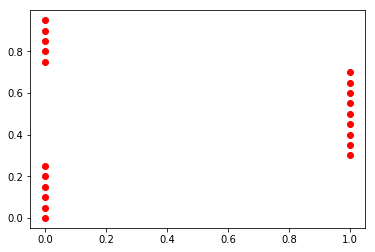

This is a plot for iteration number: 3  E step for W2 vs X


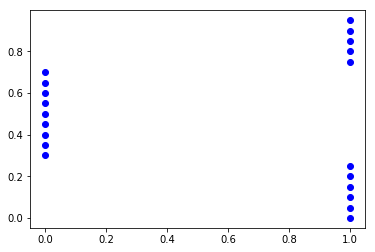

This is a plot for iteration number: 3  M step


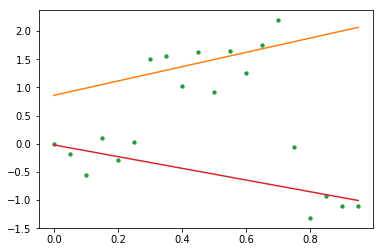

This is a plot for iteration number: 4  E step for W1 vs X


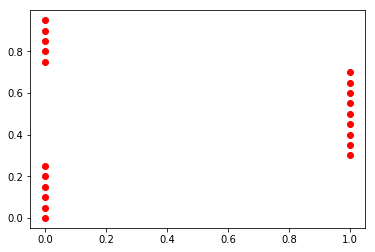

This is a plot for iteration number: 4  E step for W2 vs X


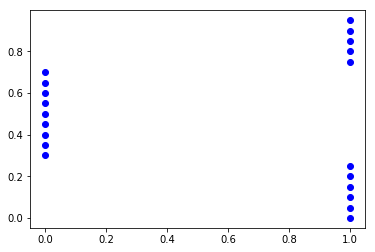

This is a plot for iteration number: 4  M step


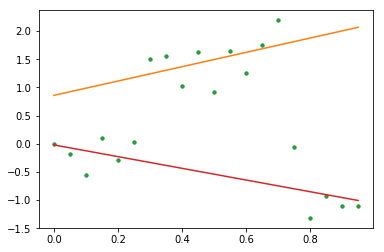

This is a plot for iteration number: 5  E step for W1 vs X


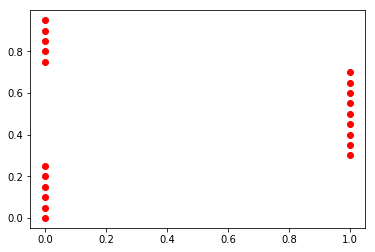

This is a plot for iteration number: 5  E step for W2 vs X


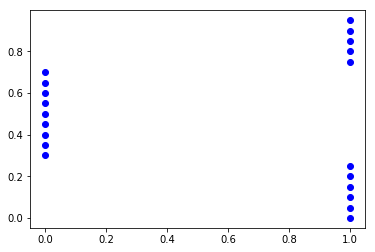

This is a plot for iteration number: 5  M step


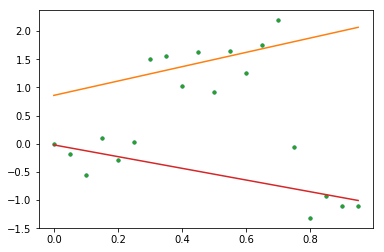

In [13]:
## Question 2
## EM ALGORITHM WITH GAUSSIAN NOISE

mu, sigma = 0, 0.3

X=np.arange(0,1,0.05).tolist()
Y=[(-x) if abs(x-0.5)>=0.25 else (x+1) for x in X]  
noise = np.random.normal(mu, sigma, [20,])
Y=Y+noise
a_1,b_1,c_1,a_2,b_2,c_2,weight_list_1,weight_list_2=EM_algorithm(X,Y)

#### Generating datapoints without any Gaussian Noise


This is a plot for iteration number: 1  E step for W1 vs X


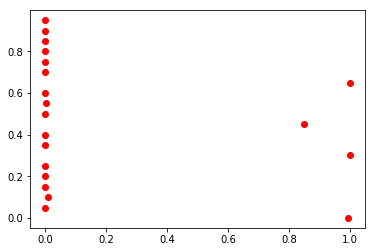

This is a plot for iteration number: 1  E step for W2 vs X


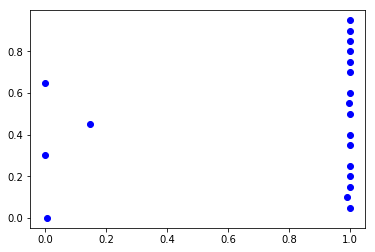

This is a plot for iteration number: 1  M step


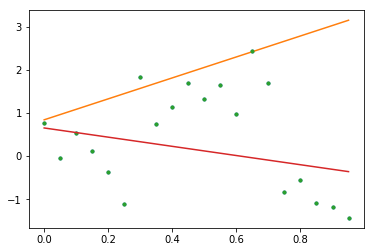

This is a plot for iteration number: 2  E step for W1 vs X


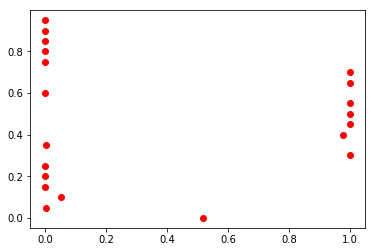

This is a plot for iteration number: 2  E step for W2 vs X


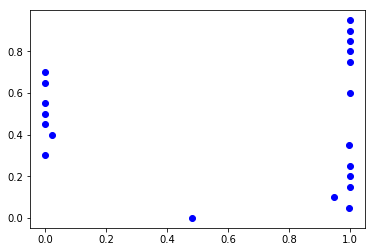

This is a plot for iteration number: 2  M step


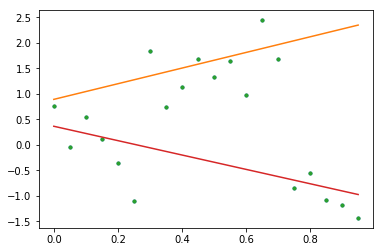

This is a plot for iteration number: 3  E step for W1 vs X


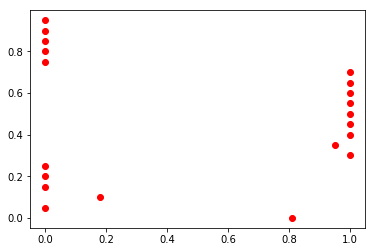

This is a plot for iteration number: 3  E step for W2 vs X


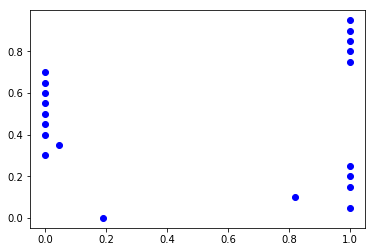

This is a plot for iteration number: 3  M step


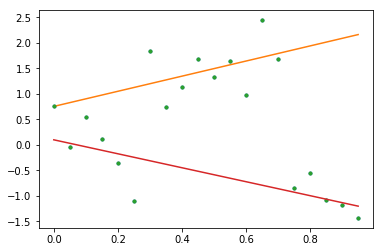

This is a plot for iteration number: 4  E step for W1 vs X


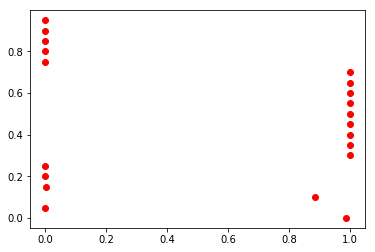

This is a plot for iteration number: 4  E step for W2 vs X


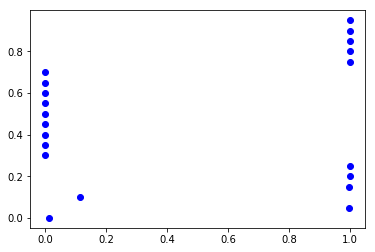

This is a plot for iteration number: 4  M step


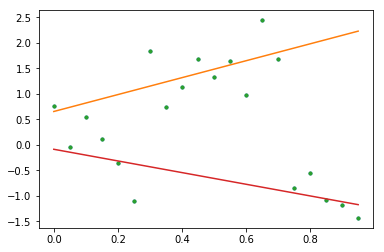

This is a plot for iteration number: 5  E step for W1 vs X


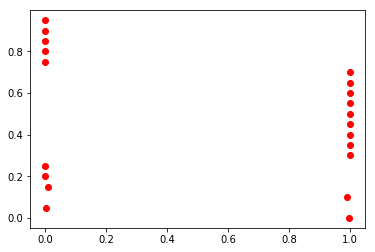

This is a plot for iteration number: 5  E step for W2 vs X


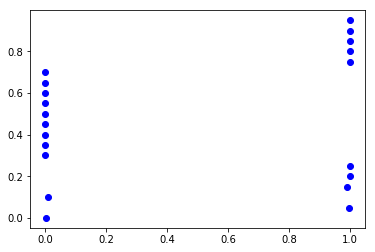

This is a plot for iteration number: 5  M step


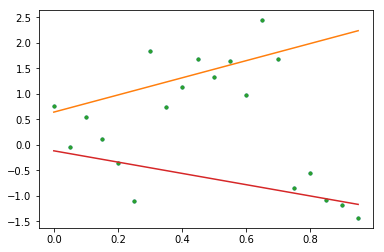

In [14]:
## Question 2
## EM ALGORITHM WITH GAUSSIAN NOISE

mu, sigma = 0, 0.4

X=np.arange(0,1,0.05).tolist()
Y=[(-x) if abs(x-0.5)>=0.25 else (x+1) for x in X]  
noise = np.random.normal(mu, sigma, [20,])
Y=Y+noise
a_1,b_1,c_1,a_2,b_2,c_2,weight_list_1,weight_list_2=EM_algorithm(X,Y)

This is a plot for iteration number: 1  E step for W1 vs X


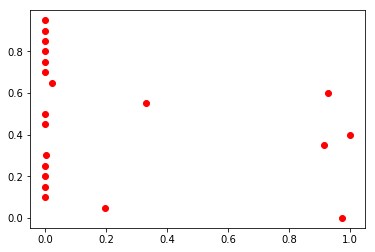

This is a plot for iteration number: 1  E step for W2 vs X


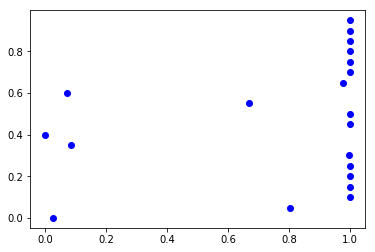

This is a plot for iteration number: 1  M step


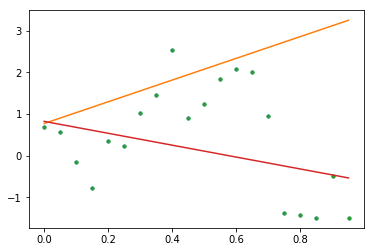

This is a plot for iteration number: 2  E step for W1 vs X


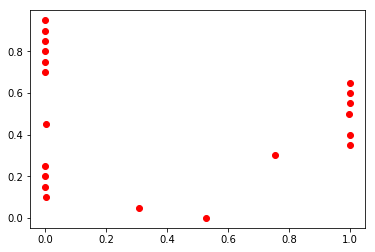

This is a plot for iteration number: 2  E step for W2 vs X


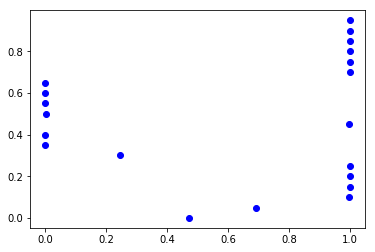

This is a plot for iteration number: 2  M step


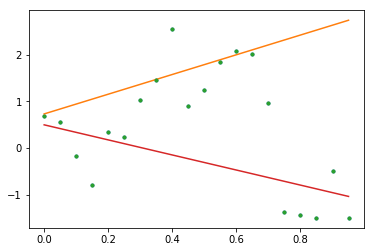

This is a plot for iteration number: 3  E step for W1 vs X


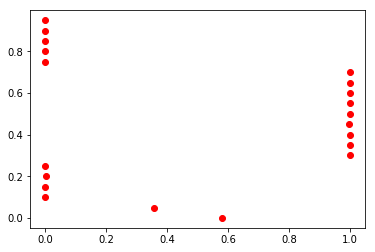

This is a plot for iteration number: 3  E step for W2 vs X


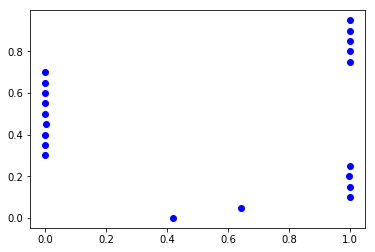

This is a plot for iteration number: 3  M step


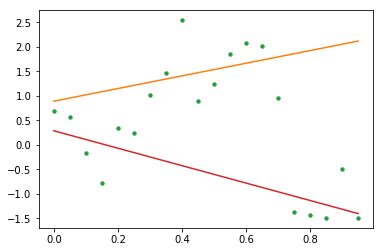

This is a plot for iteration number: 4  E step for W1 vs X


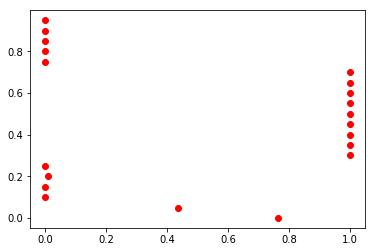

This is a plot for iteration number: 4  E step for W2 vs X


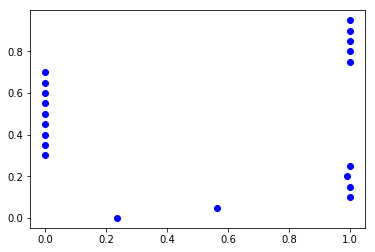

This is a plot for iteration number: 4  M step


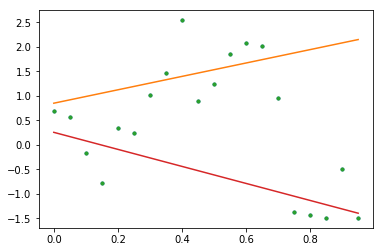

This is a plot for iteration number: 5  E step for W1 vs X


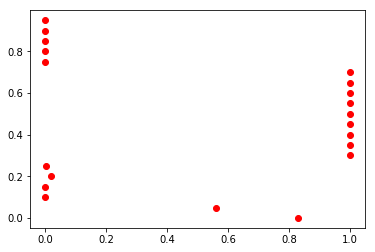

This is a plot for iteration number: 5  E step for W2 vs X


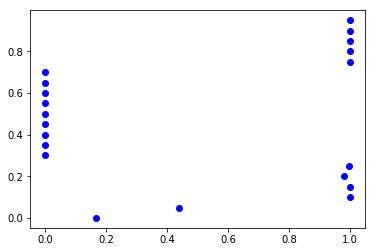

This is a plot for iteration number: 5  M step


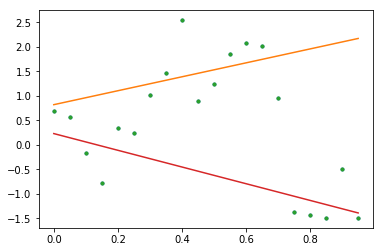

In [15]:
## Question 2
## EM ALGORITHM WITH GAUSSIAN NOISE

mu, sigma = 0, 0.5

X=np.arange(0,1,0.05).tolist()
Y=[(-x) if abs(x-0.5)>=0.25 else (x+1) for x in X]  
noise = np.random.normal(mu, sigma, [20,])
Y=Y+noise
a_1,b_1,c_1,a_2,b_2,c_2,weight_list_1,weight_list_2=EM_algorithm(X,Y)

#### Generating datapoints without any Gaussian Noise


This is a plot for iteration number: 1  E step for W1 vs X


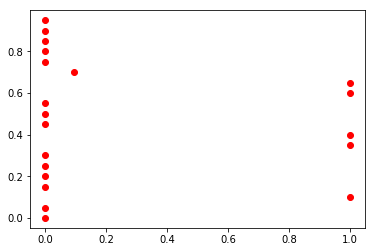

This is a plot for iteration number: 1  E step for W2 vs X


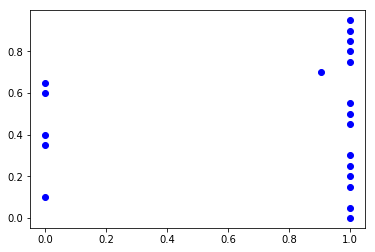

This is a plot for iteration number: 1  M step


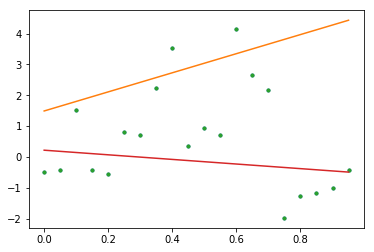

This is a plot for iteration number: 2  E step for W1 vs X


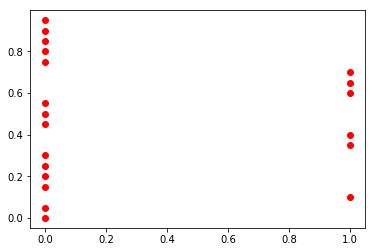

This is a plot for iteration number: 2  E step for W2 vs X


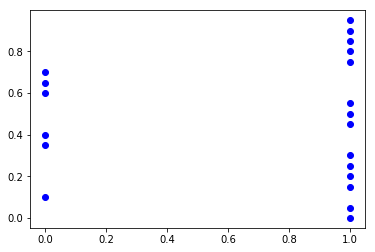

This is a plot for iteration number: 2  M step


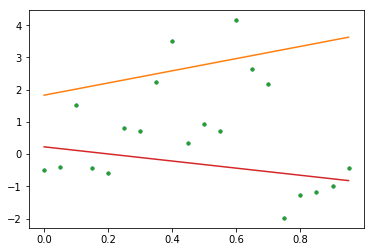

This is a plot for iteration number: 3  E step for W1 vs X


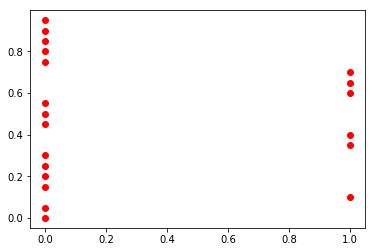

This is a plot for iteration number: 3  E step for W2 vs X


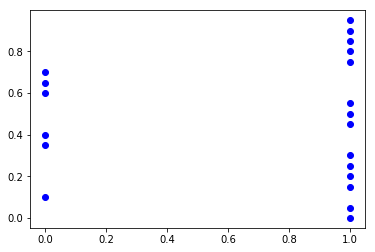

This is a plot for iteration number: 3  M step


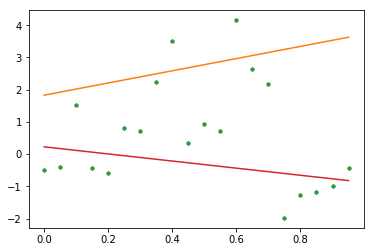

This is a plot for iteration number: 4  E step for W1 vs X


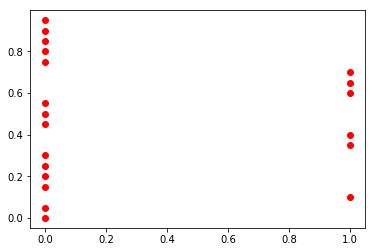

This is a plot for iteration number: 4  E step for W2 vs X


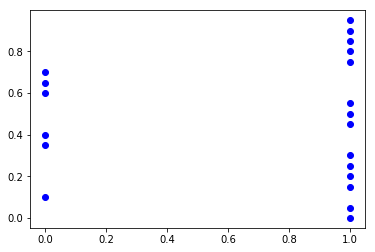

This is a plot for iteration number: 4  M step


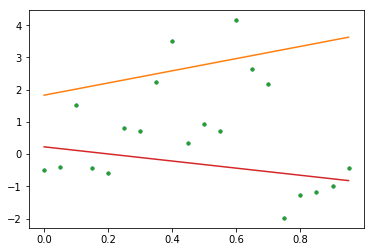

This is a plot for iteration number: 5  E step for W1 vs X


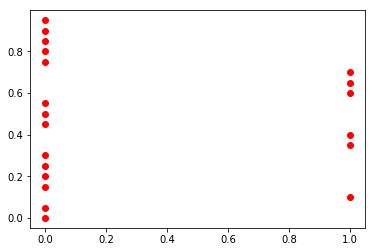

This is a plot for iteration number: 5  E step for W2 vs X


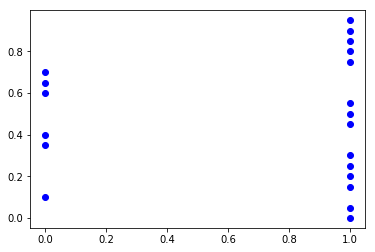

This is a plot for iteration number: 5  M step


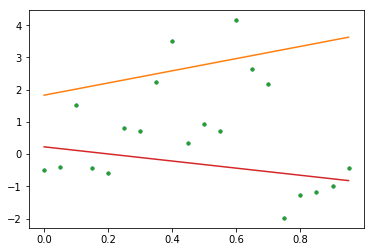

In [16]:
## Question 2
## EM ALGORITHM WITH GAUSSIAN NOISE

mu, sigma = 0, 0.8

X=np.arange(0,1,0.05).tolist()
Y=[(-x) if abs(x-0.5)>=0.25 else (x+1) for x in X]  
noise = np.random.normal(mu, sigma, [20,])
Y=Y+noise
a_1,b_1,c_1,a_2,b_2,c_2,weight_list_1,weight_list_2=EM_algorithm(X,Y)

#### Generating datapoints without any Gaussian Noise


This is a plot for iteration number: 1  E step for W1 vs X


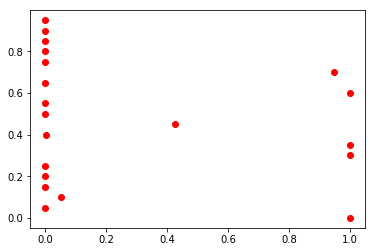

This is a plot for iteration number: 1  E step for W2 vs X


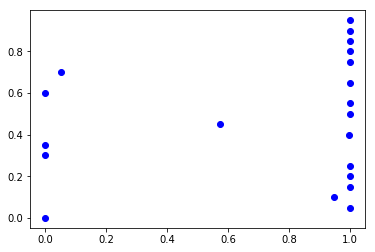

This is a plot for iteration number: 1  M step


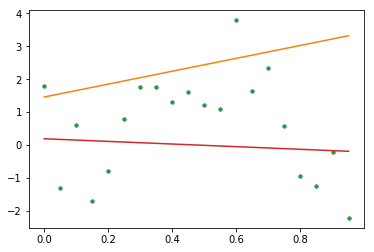

This is a plot for iteration number: 2  E step for W1 vs X


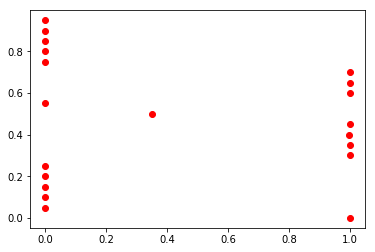

This is a plot for iteration number: 2  E step for W2 vs X


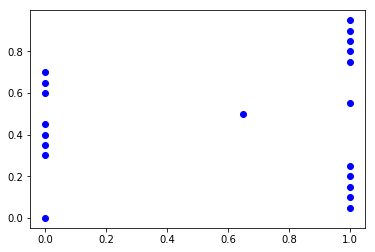

This is a plot for iteration number: 2  M step


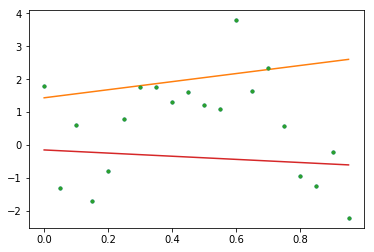

This is a plot for iteration number: 3  E step for W1 vs X


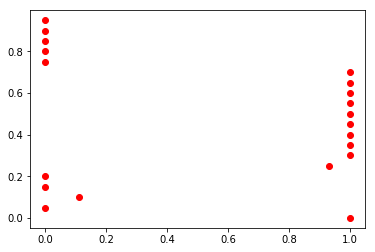

This is a plot for iteration number: 3  E step for W2 vs X


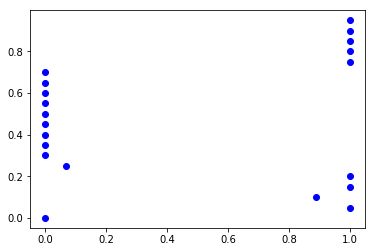

This is a plot for iteration number: 3  M step


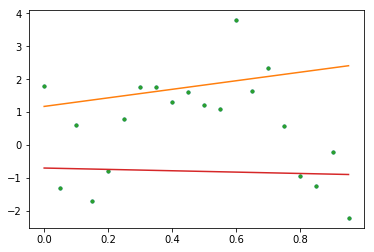

This is a plot for iteration number: 4  E step for W1 vs X


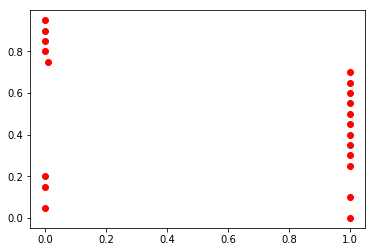

This is a plot for iteration number: 4  E step for W2 vs X


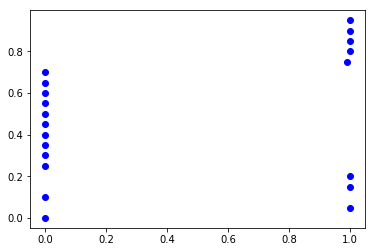

This is a plot for iteration number: 4  M step


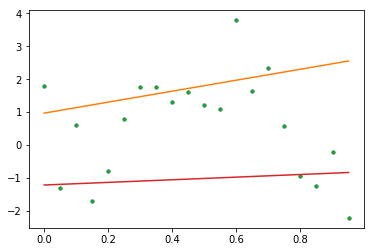

This is a plot for iteration number: 5  E step for W1 vs X


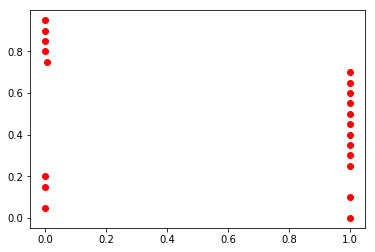

This is a plot for iteration number: 5  E step for W2 vs X


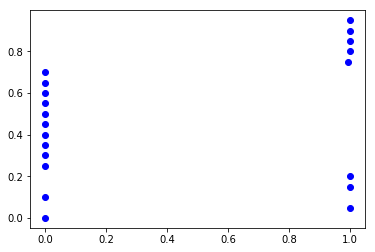

This is a plot for iteration number: 5  M step


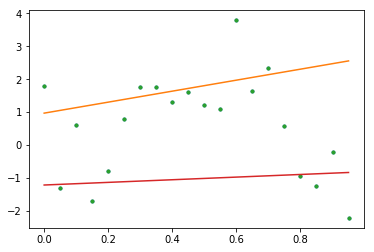

In [17]:
## Question 2
## EM ALGORITHM WITH GAUSSIAN NOISE

mu, sigma = 0, 1

X=np.arange(0,1,0.05).tolist()
Y=[(-x) if abs(x-0.5)>=0.25 else (x+1) for x in X]  
noise = np.random.normal(mu, sigma, [20,])
Y=Y+noise
a_1,b_1,c_1,a_2,b_2,c_2,weight_list_1,weight_list_2=EM_algorithm(X,Y)

#### Generating datapoints without any Gaussian Noise


This is a plot for iteration number: 1  E step for W1 vs X


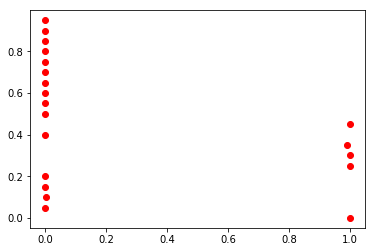

This is a plot for iteration number: 1  E step for W2 vs X


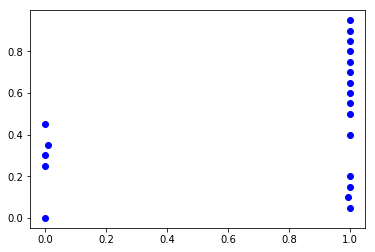

This is a plot for iteration number: 1  M step


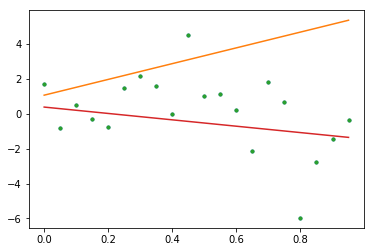

This is a plot for iteration number: 2  E step for W1 vs X


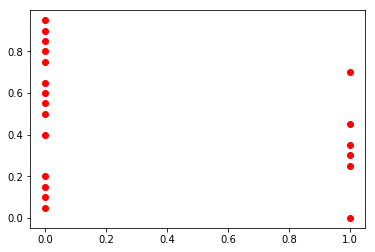

This is a plot for iteration number: 2  E step for W2 vs X


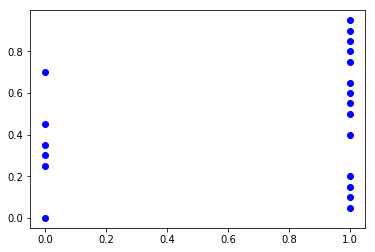

This is a plot for iteration number: 2  M step


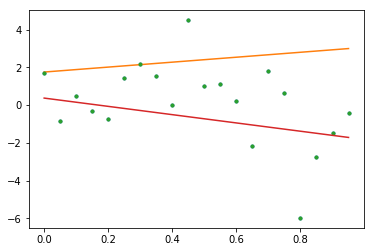

This is a plot for iteration number: 3  E step for W1 vs X


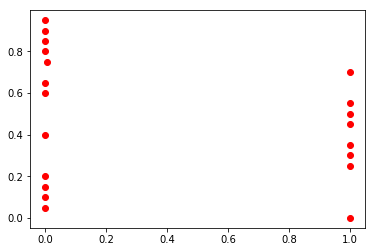

This is a plot for iteration number: 3  E step for W2 vs X


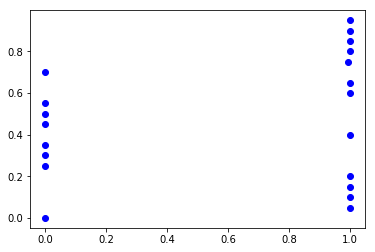

This is a plot for iteration number: 3  M step


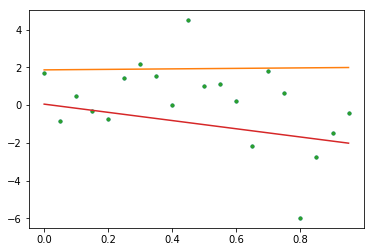

This is a plot for iteration number: 4  E step for W1 vs X


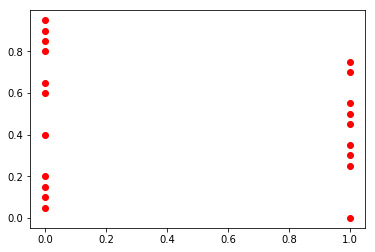

This is a plot for iteration number: 4  E step for W2 vs X


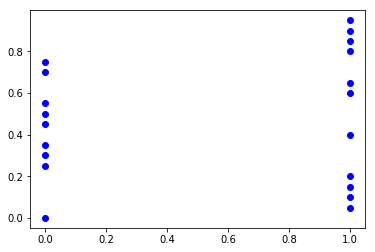

This is a plot for iteration number: 4  M step


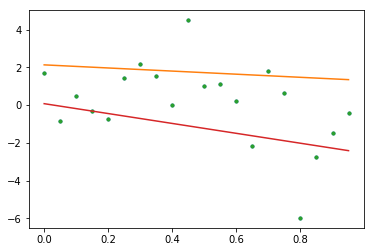

This is a plot for iteration number: 5  E step for W1 vs X


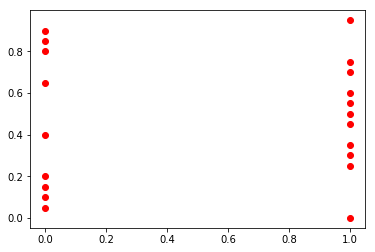

This is a plot for iteration number: 5  E step for W2 vs X


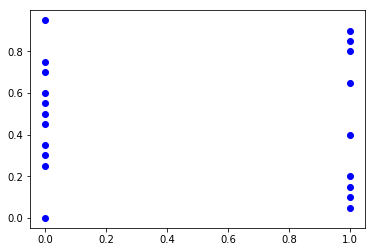

This is a plot for iteration number: 5  M step


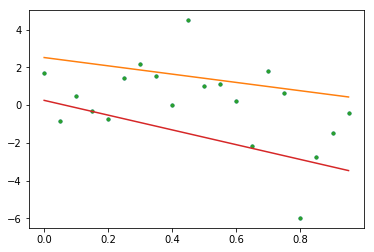

In [18]:
## Question 2
## EM ALGORITHM WITH GAUSSIAN NOISE

mu, sigma = 0, 2

X=np.arange(0,1,0.05).tolist()
Y=[(-x) if abs(x-0.5)>=0.25 else (x+1) for x in X]  
noise = np.random.normal(mu, sigma, [20,])
Y=Y+noise
a_1,b_1,c_1,a_2,b_2,c_2,weight_list_1,weight_list_2=EM_algorithm(X,Y)